In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [13]:
data = pd.read_csv("D:\C_C\data\cleaned_churn_data.csv")

In [14]:
data["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
data["Churn"].value_counts(normalize=True) *100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

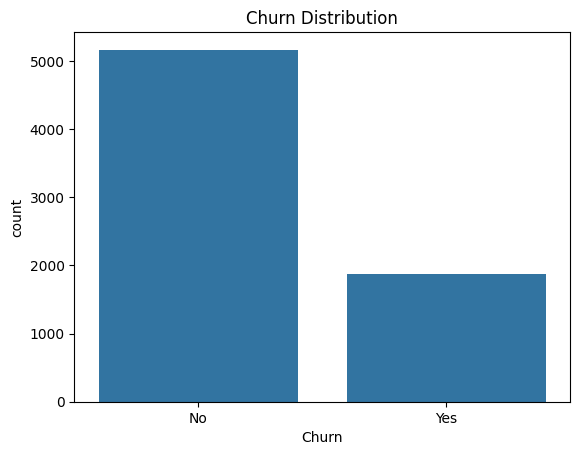

In [16]:
sns.countplot(x="Churn", data=data)
plt.title("Churn Distribution")
plt.show()


In [17]:
target_feature = 'Churn'
numeric_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
     'PaymentMethod']

In [18]:
X = data[numeric_features + categorical_features]
y = data[target_feature]

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , random_state=42,stratify = y)


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import LogisticRegression



##1 --- Numeric preprocessig batch
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

##2 --- categorical preprocessing batch
categorical_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown = 'ignore'))

])
##--- 3. Combine the above batches with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ],
    remainder = 'drop'
)
##--- 4. Create the final, full-stack pipeline
clf_pipeline = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight = 'balanced',
        random_state = 42
    ))
])




In [21]:
clf_pipeline.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [22]:
y_predict = clf_pipeline.predict(X_test)
print(y_predict)

['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']


In [23]:
y_proba = clf_pipeline.predict_proba(X_test)[:, 1]


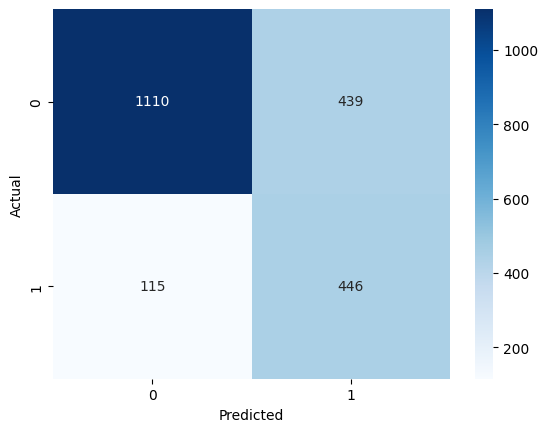

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_predict))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

          No       0.91      0.72      0.80      1549
         Yes       0.50      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

ROC-AUC: 0.8377764275497158


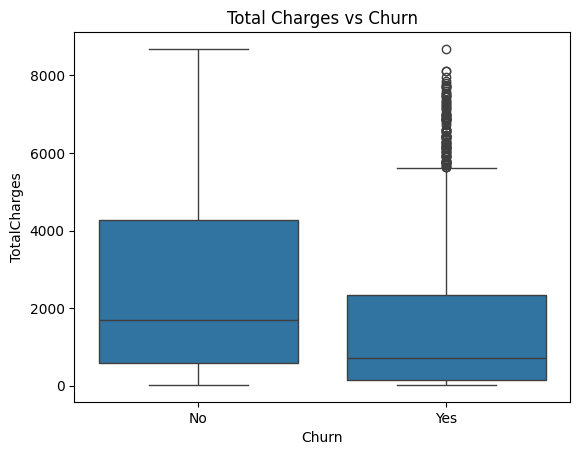

In [26]:
sns.boxplot(x="Churn", y="TotalCharges", data=data)
plt.title("Total Charges vs Churn")
plt.show()


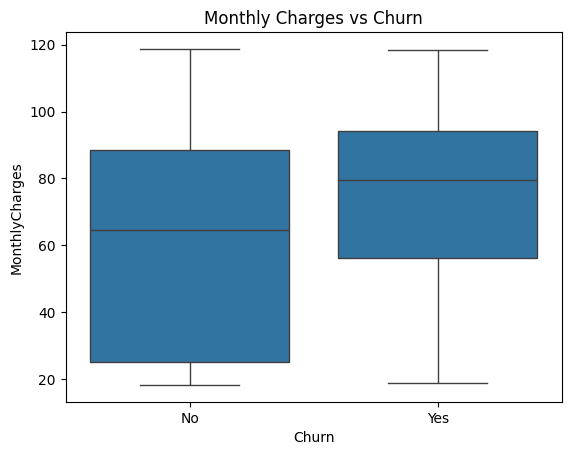

In [27]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Monthly Charges vs Churn")
plt.show()


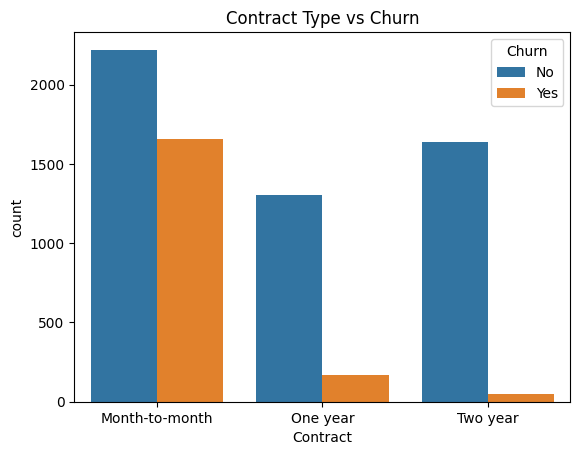

In [28]:
sns.countplot(x="Contract", hue="Churn", data=data)
plt.title("Contract Type vs Churn")
plt.show()


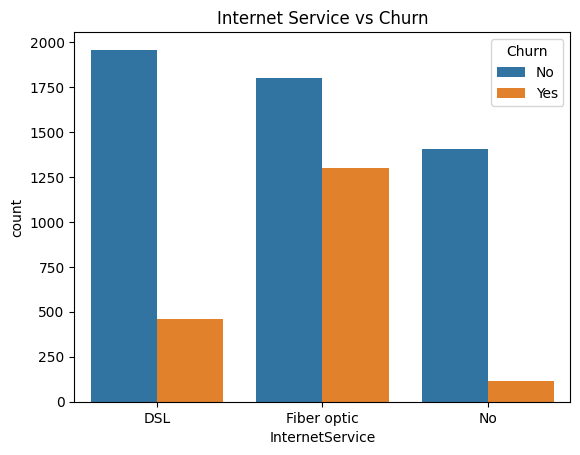

In [29]:
sns.countplot(x="InternetService", hue="Churn", data=data)
plt.title("Internet Service vs Churn")
plt.show()


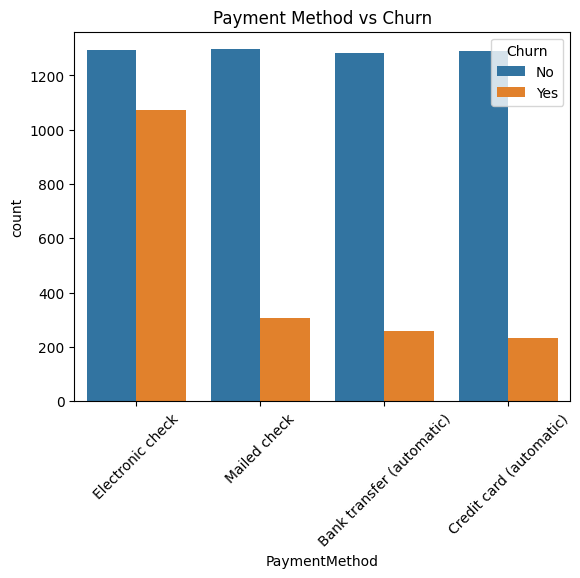

In [30]:
sns.countplot(x="PaymentMethod", hue="Churn", data=data)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()


In [31]:
def churn_rate(col):
    return (
        data.groupby(col)["Churn"]
        .value_counts(normalize=True)
        .unstack()
        .mul(100)
    )


In [32]:
churn_rate("Contract")


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


In [33]:
churn_rate("PaymentMethod")


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


In [34]:
churn_rate("InternetService")


Churn,No,Yes
InternetService,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


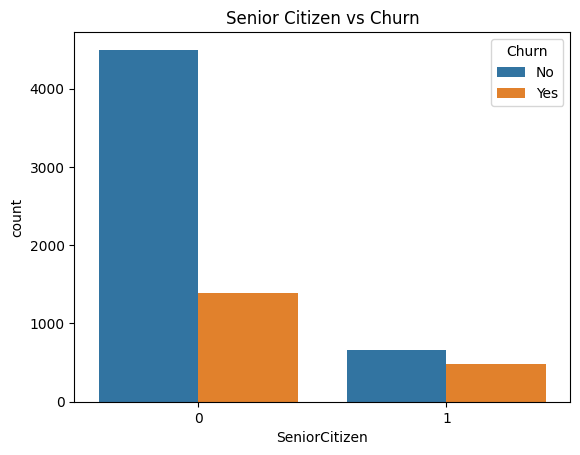

In [35]:
sns.countplot(x="SeniorCitizen", hue="Churn", data=data)
plt.title("Senior Citizen vs Churn")
plt.show()


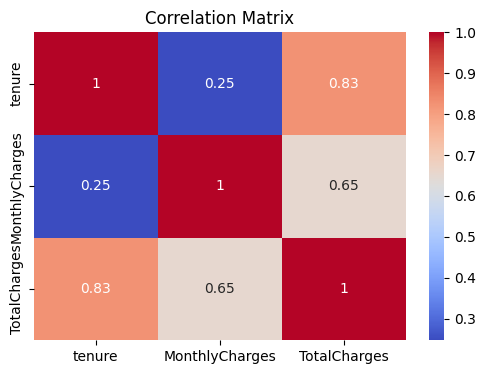

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [37]:
data.groupby("Churn")[numeric_features].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.650010,61.307408,2555.344141
Yes,17.979133,74.441332,1531.796094


In [38]:
import joblib

joblib.dump(clf_pipeline, "churn_model.pkl")


['churn_model.pkl']

In [39]:
import sklearn
print(sklearn.__version__)


1.8.0
